## Boston Gender with Python!!! 

In [1]:
import pandas as pd
import numpy as np
import csv

import matplotlib.pyplot as plt

In [2]:
#import the csv i downloaded from the website with the names -- could robotize this later..
# they have an API https://data.cityofboston.gov/Finance/Employee-Earnings-Report-2015/ah28-sywy


pay_2011 = pd.read_csv("boston_salary_raw_CSV/salary_2011.csv")






In [3]:

pay_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20509 entries, 0 to 20508
Data columns (total 12 columns):
Name               20509 non-null object
Department Name    20509 non-null object
Title              20509 non-null object
Regular            20509 non-null object
Retro              20509 non-null object
Other              20509 non-null object
Overtime           20509 non-null object
Injured            20509 non-null object
Detail             20508 non-null object
Quinn              20509 non-null object
Total Earnings     20509 non-null object
Zip Code           20509 non-null object
dtypes: object(12)
memory usage: 1.9+ MB


In [4]:

pay_2011.head(10)

,Name,Department Name,Title,Regular,Retro,Other,Overtime,Injured,Detail,Quinn,Total Earnings,Zip Code
0,"Abadi,Kidani A",Assessing Department,Property Officer (Asn),$33065.38,$0.00,$0.00,$379.49,$0.00,$0.00,$0.00,$33444.87,02118-3126
1,"Ablon,Jordan N",ASD Office Of Labor Relation,Asst Corp Counsel III,$76051.24,$0.00,$1321.03,$0.00,$0.00,$0.00,$0.00,$77372.27,02135-5943
2,"Accardi,Patricia",Transportation-Parking Clerk,Chief Claims Investigator,$56430.79,$0.00,$0.00,$418.58,$0.00,$0.00,$0.00,$56849.37,02081-3751
3,"Ackerly,Lyn E.",Boston Public Library,Spec Library Asst I,$35058.78,$0.00,$0.00,$439.19,$0.00,$0.00,$0.00,$35497.97,02118-0000
4,"Adams,Carey L.",Law Department,Prin Clerk,$41588.83,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$41588.83,02131-4834
5,"Adams,Dean",Public Works Department,Highway Maint Frprs (Pwd)##,$37693.81,$0.00,$6761.54,$11485.32,$0.00,$0.00,$0.00,$55940.67,02124-1112
6,"Adams,Natasha",Boston Cntr - Youth & Families,Youth Worker,$38330.84,$0.00,$0.00,$47.14,$0.00,$0.00,$0.00,$38377.98,02124-4418
7,"Adario,Anthony J",ASD Human Resources,Supvising Claims Agent (Asd),$85214.42,$0.00,$1629.36,$0.00,$0.00,$0.00,$0.00,$86843.78,02132-3000
8,"Addessa,Rocco",Property Management,Jr Building Custodian,$39322.79,$0.00,$0.00,$3720.81,$0.00,$0.00,$0.00,$43043.60,02128-1617
9,"Afonseca,Jose",Boston Cntr - Youth & Families,Certified Seasonal Lifeguard,$4400.45,$0.00,$0.00,$137.99,$0.00,$0.00,$0.00,$4538.44,02124-1214


what would I like to do now? for the graphic, I need to genderize, and then pick the top 100 people by pay.
the genderizer uses first name,so I need to make a column of first names..Ill start with the 2016 data set and aim to have this done soon to update my graphic...
...Ill have to experiment a bit with the genderizer so will pull out 20 names to test them..

In [5]:
df = pay_2011

df.head()

,Name,Department Name,Title,Regular,Retro,Other,Overtime,Injured,Detail,Quinn,Total Earnings,Zip Code
0,"Abadi,Kidani A",Assessing Department,Property Officer (Asn),$33065.38,$0.00,$0.00,$379.49,$0.00,$0.00,$0.00,$33444.87,02118-3126
1,"Ablon,Jordan N",ASD Office Of Labor Relation,Asst Corp Counsel III,$76051.24,$0.00,$1321.03,$0.00,$0.00,$0.00,$0.00,$77372.27,02135-5943
2,"Accardi,Patricia",Transportation-Parking Clerk,Chief Claims Investigator,$56430.79,$0.00,$0.00,$418.58,$0.00,$0.00,$0.00,$56849.37,02081-3751
3,"Ackerly,Lyn E.",Boston Public Library,Spec Library Asst I,$35058.78,$0.00,$0.00,$439.19,$0.00,$0.00,$0.00,$35497.97,02118-0000
4,"Adams,Carey L.",Law Department,Prin Clerk,$41588.83,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$41588.83,02131-4834


In [6]:
#do I need to make sure other stuff is string?
#do I need to make sure other stuff is string?


df['Regular'] = (df['Regular'].replace( '[\$,)]','', regex=True ).astype(float)).round()
df['Retro'] = (df['Retro'].replace( '[\$,)]','', regex=True ).astype(float)).round()
df['Other'] = (df['Other'].replace( '[\$,)]','', regex=True ).astype(float)).round()
df['Overtime'] = (df['Overtime'].replace( '[\$,)]','', regex=True ).astype(float)).round()
df['Injured'] = (df['Injured'].replace( '[\$,)]','', regex=True ).astype(float)).round()
#in 2015 its detailS vs 2011,2016 detail 
#2013its just Quinn, not quinn/edu has in 2015 2016
df['Quinn'] = (df['Quinn'].replace( '[\$,)]','', regex=True ).astype(float)).round()
df['Total Earnings'] = (df['Total Earnings'].replace( '[\$,)]','', regex=True ).astype(float)).round()



#for whatever reason in 2012 detail wouldnt change , but i dont need it so leaving it

In [7]:

df = df.rename(columns = {
'Regular':"salary",
'Retro':"retroactive",
'Other':'other',
'Overtime':'overtime',
'Detail':'detail',
'Injured':'injured',
'Quinn':'quinn',
'Total Earnings':'totalSalary',
'Name':'name',
"Department Name" : "dept",
"Title" : "title",
"Zip Code" : "zip_code",
    
    
})
df.head()




,name,dept,title,salary,retroactive,other,overtime,injured,detail,quinn,totalSalary,zip_code
0,"Abadi,Kidani A",Assessing Department,Property Officer (Asn),33065.0,0.0,0.0,379.0,0.0,$0.00,0.0,33445.0,02118-3126
1,"Ablon,Jordan N",ASD Office Of Labor Relation,Asst Corp Counsel III,76051.0,0.0,1321.0,0.0,0.0,$0.00,0.0,77372.0,02135-5943
2,"Accardi,Patricia",Transportation-Parking Clerk,Chief Claims Investigator,56431.0,0.0,0.0,419.0,0.0,$0.00,0.0,56849.0,02081-3751
3,"Ackerly,Lyn E.",Boston Public Library,Spec Library Asst I,35059.0,0.0,0.0,439.0,0.0,$0.00,0.0,35498.0,02118-0000
4,"Adams,Carey L.",Law Department,Prin Clerk,41589.0,0.0,0.0,0.0,0.0,$0.00,0.0,41589.0,02131-4834


In [8]:
#the csv used for d3(v3) jsI want to update has this: columns are name, 
#firstName, dept, salary, totalSalary(still has $), gender -- is just F or M 

here i want to sort on the salary and then cut off at the first 200 to not use too much of teh API right now..$9 dolalrs!!!! 

In [9]:
#sort on salaries 
df = df.sort_values('salary', ascending=False)


had to do the splitting off of first name in two steps that probably should be one so can review later..below might help

#see this
#https://stackoverflow.com/questions/29585106/pandas-how-to-split-twice-a-given-field
 #try this:
trimmed_list = [i.replace('.', ',').split(',') for i in sbj[0].tolist() if i != ""]
item_list = [item.strip(whitespace) for item in itertools.chain(*trimmed_list)]
item_count = Counter(item_list)


In [10]:
df['firstName'] = df.name.apply(lambda x: x.split(',')[1])
df.head(5)

,name,dept,title,salary,retroactive,other,overtime,injured,detail,quinn,totalSalary,zip_code,firstName
13848,"Johnson,Carol R",Boston Public Schools,Superintendent,266750.0,0.0,56472.0,0.0,0.0,$0.00,0.0,323222.0,02129-4233,Carol R
2960,"Ryan,Amy E",Boston Public Library,President,175000.0,0.0,20000.0,0.0,0.0,$0.00,0.0,195000.0,02135-1517,Amy E
2282,"Menino,Thomas M.",Mayor's Office,Mayor,175000.0,0.0,0.0,0.0,0.0,$0.00,0.0,175000.0,02136-1932,Thomas M.
15591,"McDonough,John P",Boston Public Schools,Chief Financial Officer,174492.0,0.0,3233.0,0.0,0.0,$0.00,0.0,177725.0,02130-3451,John P
12560,"Goar,Michael",Boston Public Schools,Deputy Superintendent,174407.0,0.0,3308.0,0.0,0.0,$0.00,0.0,177715.0,02124-5601,Michael


In [11]:
df['firstName'] = df.firstName.apply(lambda x: x.split(' ')[0])
df.head(5)



,name,dept,title,salary,retroactive,other,overtime,injured,detail,quinn,totalSalary,zip_code,firstName
13848,"Johnson,Carol R",Boston Public Schools,Superintendent,266750.0,0.0,56472.0,0.0,0.0,$0.00,0.0,323222.0,02129-4233,Carol
2960,"Ryan,Amy E",Boston Public Library,President,175000.0,0.0,20000.0,0.0,0.0,$0.00,0.0,195000.0,02135-1517,Amy
2282,"Menino,Thomas M.",Mayor's Office,Mayor,175000.0,0.0,0.0,0.0,0.0,$0.00,0.0,175000.0,02136-1932,Thomas
15591,"McDonough,John P",Boston Public Schools,Chief Financial Officer,174492.0,0.0,3233.0,0.0,0.0,$0.00,0.0,177725.0,02130-3451,John
12560,"Goar,Michael",Boston Public Schools,Deputy Superintendent,174407.0,0.0,3308.0,0.0,0.0,$0.00,0.0,177715.0,02124-5601,Michael


In [12]:
#make a shorter df so as to not genderize so many -- ill do 500
df_top_500 = df.head(500)

In [13]:
df_top_500.tail()

,name,dept,title,salary,retroactive,other,overtime,injured,detail,quinn,totalSalary,zip_code,firstName
7475,"Howard,John J",Boston Fire Department,District Fire Chief-Technician,108959.0,0.0,80585.0,15496.0,0.0,$0.00,0.0,205039.0,02375-1233,John
18193,"Salmon Jr.,Richard L",Boston Public Schools,Asst Principal Middle,108934.0,0.0,1040.0,0.0,0.0,$0.00,0.0,109974.0,02465-1831,Richard
11375,"Dodd,Melissa P.",Boston Public Schools,Chief Information Officer,108925.0,0.0,0.0,0.0,0.0,$0.00,0.0,108925.0,02131-3914,Melissa
7015,"Coppney,Sean E",Boston Fire Department,Fire Captain,108818.0,0.0,4957.0,13751.0,0.0,$288.00,0.0,127814.0,02127-4211,Sean
12164,"Fox,Debra L",Boston Public Schools,Academy Director (Basas 12),108785.0,0.0,2000.0,0.0,0.0,$0.00,0.0,110785.0,02067-3316,Debra


create a column called gender

In [14]:
#genderize using my API key , $9!!!!!
from genderize import Genderize
genderize = Genderize(
    user_agent='GenderizeDocs/0.0',
    api_key='08402238f4c2af82034ed0a16e4d36cb')

In [15]:
#df2['gender_try2'] = genderize.get(df2['name'],country_id='US')
df_top_500['genderize_results'] = genderize.get(df_top_500['firstName'],country_id='US')

/Users/hw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
df_top_500.head(5)

,name,dept,title,salary,retroactive,other,overtime,injured,detail,quinn,totalSalary,zip_code,firstName,genderize_results
13848,"Johnson,Carol R",Boston Public Schools,Superintendent,266750.0,0.0,56472.0,0.0,0.0,$0.00,0.0,323222.0,02129-4233,Carol,"{'name': 'Carol', 'gender': 'female', 'probabi..."
2960,"Ryan,Amy E",Boston Public Library,President,175000.0,0.0,20000.0,0.0,0.0,$0.00,0.0,195000.0,02135-1517,Amy,"{'name': 'Amy', 'gender': 'female', 'probabili..."
2282,"Menino,Thomas M.",Mayor's Office,Mayor,175000.0,0.0,0.0,0.0,0.0,$0.00,0.0,175000.0,02136-1932,Thomas,"{'name': 'Thomas', 'gender': 'male', 'probabil..."
15591,"McDonough,John P",Boston Public Schools,Chief Financial Officer,174492.0,0.0,3233.0,0.0,0.0,$0.00,0.0,177725.0,02130-3451,John,"{'name': 'John', 'gender': 'male', 'probabilit..."
12560,"Goar,Michael",Boston Public Schools,Deputy Superintendent,174407.0,0.0,3308.0,0.0,0.0,$0.00,0.0,177715.0,02124-5601,Michael,"{'name': 'Michael', 'gender': 'male', 'probabi..."


grab the gender only from the genderize column and add it as a column

In [17]:
gender1 = []

for item in df_top_500['genderize_results']:
    gender_id = item['gender']
    gender1.append(gender_id)
    
df_top_500["gender"] = gender1
df_top_500.head(4)

/Users/hw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,name,dept,title,salary,retroactive,other,overtime,injured,detail,quinn,totalSalary,zip_code,firstName,genderize_results,gender
13848,"Johnson,Carol R",Boston Public Schools,Superintendent,266750.0,0.0,56472.0,0.0,0.0,$0.00,0.0,323222.0,02129-4233,Carol,"{'name': 'Carol', 'gender': 'female', 'probabi...",female
2960,"Ryan,Amy E",Boston Public Library,President,175000.0,0.0,20000.0,0.0,0.0,$0.00,0.0,195000.0,02135-1517,Amy,"{'name': 'Amy', 'gender': 'female', 'probabili...",female
2282,"Menino,Thomas M.",Mayor's Office,Mayor,175000.0,0.0,0.0,0.0,0.0,$0.00,0.0,175000.0,02136-1932,Thomas,"{'name': 'Thomas', 'gender': 'male', 'probabil...",male
15591,"McDonough,John P",Boston Public Schools,Chief Financial Officer,174492.0,0.0,3233.0,0.0,0.0,$0.00,0.0,177725.0,02130-3451,John,"{'name': 'John', 'gender': 'male', 'probabilit...",male


change the order of the columns


In [18]:
cols = list(df_top_500.columns.values)
cols

['name',
 'dept',
 'title',
 'salary',
 'retroactive',
 'other',
 'overtime',
 'injured',
 'detail',
 'quinn',
 'totalSalary',
 'zip_code',
 'firstName',
 'genderize_results',
 'gender']

In [20]:
#detail is still messed up here but dont use anyway

df_top_500 = df_top_500[[
 'name',
'firstName',
 'gender',
 'salary',
'totalSalary',
'dept',
 'title',
'genderize_results',
 'retroactive',
 'other',
 'overtime',
 'injured',
 'detail',
 'quinn',
 'zip_code', 
 ]]
df_top_500.head()

,name,firstName,gender,salary,totalSalary,dept,title,genderize_results,retroactive,other,overtime,injured,detail,quinn,zip_code
13848,"Johnson,Carol R",Carol,female,266750.0,323222.0,Boston Public Schools,Superintendent,"{'name': 'Carol', 'gender': 'female', 'probabi...",0.0,56472.0,0.0,0.0,$0.00,0.0,02129-4233
2960,"Ryan,Amy E",Amy,female,175000.0,195000.0,Boston Public Library,President,"{'name': 'Amy', 'gender': 'female', 'probabili...",0.0,20000.0,0.0,0.0,$0.00,0.0,02135-1517
2282,"Menino,Thomas M.",Thomas,male,175000.0,175000.0,Mayor's Office,Mayor,"{'name': 'Thomas', 'gender': 'male', 'probabil...",0.0,0.0,0.0,0.0,$0.00,0.0,02136-1932
15591,"McDonough,John P",John,male,174492.0,177725.0,Boston Public Schools,Chief Financial Officer,"{'name': 'John', 'gender': 'male', 'probabilit...",0.0,3233.0,0.0,0.0,$0.00,0.0,02130-3451
12560,"Goar,Michael",Michael,male,174407.0,177715.0,Boston Public Schools,Deputy Superintendent,"{'name': 'Michael', 'gender': 'male', 'probabi...",0.0,3308.0,0.0,0.0,$0.00,0.0,02124-5601


now I'd like to see how many there are of each type in the new gender column...

In [21]:
df_top_500['gender'].value_counts() 

male      325
female    154
Name: gender, dtype: int64

SO 479 GOT COUNTED OUT OF 500 

In [23]:
df_top_500.count() 

name                 500
firstName            500
gender               479
salary               500
totalSalary          500
dept                 500
title                500
genderize_results    500
retroactive          500
other                500
overtime             500
injured              500
detail               500
quinn                500
zip_code             500
dtype: int64

In [24]:
df_top_500['gender'].head(100).value_counts() 
#TOP 100 IS 100 out of 100

male      90
female    10
Name: gender, dtype: int64

these two women WERE listed as unknowns with prior gender filter, so Ill looked them up 
13129          McCreary,Makeeba   Makeeba                 Communications   
6050   Edouard-Vincent,Marice M    Marice  Asst Superintendent-Network A 

In [26]:
df_top_500[df_top_500['name'].str.contains(r"\bMarice\b", case = False)]

,name,firstName,gender,salary,totalSalary,dept,title,genderize_results,retroactive,other,overtime,injured,detail,quinn,zip_code
11636,"Edouard-Vincent,Marice M",Marice,male,124628.0,125228.0,Boston Public Schools,Principal Elementary,"{'name': 'Marice', 'gender': 'male', 'probabil...",0.0,600.0,0.0,0.0,$0.00,0.0,02136-3419


Marice should be a woman, since I looked her and makeeba up im going to fix in the data set..
13129          McCreary,Makeeba   Makeeba                 Communications   
6050   Edouard-Vincent,Marice M    Marice  Asst Superintendent-Network A 

In [27]:
df_top_500.loc[df_top_500['name'] == "Edouard-Vincent,Marice M", "gender"] = "female"

In [28]:
df_top_500[df_top_500['name'].str.contains(r"\bKamalkant\b", case = False)]

,name,firstName,gender,salary,totalSalary,dept,title,genderize_results,retroactive,other,overtime,injured,detail,quinn,zip_code
10222,"Chavda,Kamalkant A",Kamalkant,None,126432.0,126432.0,Boston Public Schools,Director (E) (non-ac),"{'name': 'Kamalkant', 'gender': None}",0.0,0.0,0.0,0.0,$0.00,0.0,03290-5824


In [29]:
#according to web lookup chavda is a male
df_top_500.loc[df_top_500['name'] == "Chavda,Kamalkant A", "gender"] = "male"

In [31]:
df_top_500['gender'].value_counts() 

male      325
female    155
Name: gender, dtype: int64

find row where gender is not male or female

In [32]:
#https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas
#df.loc[df['column_name'] == some_value] To select rows whose column value does not equal some_value, use !=:
check = df_top_500.head(100)
genders = ["male","female"]

check.loc[~check['gender'].isin(genders)]

,name,firstName,gender,salary,totalSalary,dept,title,genderize_results,retroactive,other,overtime,injured,detail,quinn,zip_code


In [33]:
#queon is a guy
df_top_500.loc[df_top_500['firstName'] == "Queon", "gender"] = "male"



In [34]:
df_top_500['gender'].value_counts() 
#now its 100 / 100

male      326
female    155
Name: gender, dtype: int64

McCreary - F
https://www.bostonpublicschools.org/site/default.aspx?PageType=3&ModuleInstanceID=9715&ViewID=7b97f7ed-8e5e-4120-848f-a8b4987d588f&RenderLoc=0&FlexDataID=7541&PageID=4853

 Edouard-Vincent,Marice - F
https://twitter.com/netsuptb?lang=en

McGovern,Ryan J -- M
http://www.firehouse.com/news/11252963/after-falling-through-floor-boston-firefighter-thankful-for-minor-injuries

Franklin-Hodge,Jascha -- M
https://www.boston.gov/departments/innovation-and-technology/jascha-franklin-hodge

  Nee,Kelly A  -- F
https://www.youtube.com/watch?v=2x7OrSKi_04

 Driscoll,Mary E      Mary  Asst Superintendent-Network A - F
 https://www.bc.edu/schools/csom/lynchacademy/alumni/2012/Driscoll.html
 
  Hung,Kelly M     Kelly  Asst Superintendent-Network A  153503.93 -- F
  
  https://www.bc.edu/schools/csom/lynchacademy/alumni/2014/KHung.html
  
  Queon, Jackson - male https://www.bostonglobe.com/metro/2016/08/05/paid-leave-dragged-years-former-boston-headmaster-collected/E5kOej6eS7LOeBC40IVkfO/story.html

In [36]:
df_top_500.dtypes


name                  object
firstName             object
gender                object
salary               float64
totalSalary          float64
dept                  object
title                 object
genderize_results     object
retroactive          float64
other                float64
overtime             float64
injured              float64
detail                object
quinn                float64
zip_code              object
dtype: object

In [37]:
print(d_top_500.shape)



(500, 15)


In [38]:
#this is a repeat from earlier but can't hurt 
salarySorted = df_top_500.sort_values(by='salary', ascending=False)
salarySorted.head()




,name,firstName,gender,salary,totalSalary,dept,title,genderize_results,retroactive,other,overtime,injured,detail,quinn,zip_code
13848,"Johnson,Carol R",Carol,female,266750.0,323222.0,Boston Public Schools,Superintendent,"{'name': 'Carol', 'gender': 'female', 'probabi...",0.0,56472.0,0.0,0.0,$0.00,0.0,02129-4233
2960,"Ryan,Amy E",Amy,female,175000.0,195000.0,Boston Public Library,President,"{'name': 'Amy', 'gender': 'female', 'probabili...",0.0,20000.0,0.0,0.0,$0.00,0.0,02135-1517
2282,"Menino,Thomas M.",Thomas,male,175000.0,175000.0,Mayor's Office,Mayor,"{'name': 'Thomas', 'gender': 'male', 'probabil...",0.0,0.0,0.0,0.0,$0.00,0.0,02136-1932
15591,"McDonough,John P",John,male,174492.0,177725.0,Boston Public Schools,Chief Financial Officer,"{'name': 'John', 'gender': 'male', 'probabilit...",0.0,3233.0,0.0,0.0,$0.00,0.0,02130-3451
12560,"Goar,Michael",Michael,male,174407.0,177715.0,Boston Public Schools,Deputy Superintendent,"{'name': 'Michael', 'gender': 'male', 'probabi...",0.0,3308.0,0.0,0.0,$0.00,0.0,02124-5601


In [39]:
#make csv with just the earlier data columns ie 6 of them newdf = df[(df['column_one']>2004) & (df['column_two']==9)]
#AND JUST PICK THE TOP 100 
shortForCsv = salarySorted[["name", "firstName","dept", "salary", "totalSalary","gender"]].head(100)

shortForCsv['gender'].value_counts()



male      90
female    10
Name: gender, dtype: int64

In [40]:
shortForCsv["dept"].value_counts() 

Boston Fire Department            57
Boston Police Department          20
Boston Public Schools             12
Mayor's Office                     3
Law Department                     1
Treasury-Treasury Division         1
Boston Public Library              1
Neighborhood Development           1
Dpt of Innovation & Technology     1
Property Management                1
State Boston Retirement Syst       1
Assessing Department               1
Name: dept, dtype: int64

In [41]:
test = shortForCsv[(shortForCsv['dept']== "Fam & Student Engagemt")]
test1 = shortForCsv[(shortForCsv['dept']== "Achievement Gap")]
test2 = shortForCsv[(shortForCsv['dept']== "Kennedy, EM Health Academy")]

test



,name,firstName,dept,salary,totalSalary,gender


grouping the departments so its easier to see that these variously named roles are part of school system or mayors office, etc, though need to do more for mayors office grouping

perhaps treasury and inovation tech shoud be grouped into mayors office

In [42]:
shortForCsv.loc[shortForCsv['dept'] == "Asst Superintendent-Network A", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS Special Education", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Fam & Student Engagemt", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Achievement Gap", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Kennedy, EM Health Academy", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS Human Resource Team", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Superintendent", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Asst Superintendent-Network G", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Asst Superintendent-Network B", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS Boston Latin", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Asst Superintendent-Network E", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Asst Superintendent-Network F", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Asst Superintendent-Network D", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS Equity", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS English High", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS Murphy Elementary", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS Brighton High", "dept"] = "Boston Public Schools"




#put school chief chang in new school dept group not needed
#shortForCsv.loc[shortForCsv['name'] == "Chang,Tommy", "dept"] = "Boston Public Schools"
#shortForCsv.loc[shortForCsv['name'] == "Chavda,Kamalkant A", "gender"] = "male"




shortForCsv["dept"].value_counts()





Boston Fire Department            57
Boston Police Department          20
Boston Public Schools             12
Mayor's Office                     3
Law Department                     1
Treasury-Treasury Division         1
Boston Public Library              1
Neighborhood Development           1
Dpt of Innovation & Technology     1
Property Management                1
State Boston Retirement Syst       1
Assessing Department               1
Name: dept, dtype: int64

In [43]:
df_top_500["dept"].value_counts()

Boston Public Schools             217
Boston Fire Department            168
Boston Police Department           49
Dpt of Innovation & Technology      8
Public Works Department             6
Transportation Department           6
Mayor's Office                      5
Neighborhood Development            4
Boston Public Library               4
Property Management                 4
ASD Human Resources                 3
Assessing Department                3
Inspectional Services Dept          3
Law Department                      3
ASD Office of Budget Mangmnt        2
ASD Intergvernmtl Relations         2
Treasury-Treasury Division          2
Parks Department                    2
State Boston Retirement Syst        2
Environment Department              1
Emergency Management                1
Boston Cntr - Youth & Families      1
Auditing Department                 1
ASD Purchasing Division             1
ASD Office Of Labor Relation        1
Administration and Finance          1
Name: dept, 

In [44]:
print(shortForCsv)

                           name firstName                            dept  \
13848           Johnson,Carol R     Carol           Boston Public Schools   
2960                 Ryan,Amy E       Amy           Boston Public Library   
2282           Menino,Thomas M.    Thomas                  Mayor's Office   
15591          McDonough,John P      John           Boston Public Schools   
12560              Goar,Michael   Michael           Boston Public Schools   
8265           Tully,Bernard J.   Bernard          Boston Fire Department   
7285      Fraser Jr.,Roderick J  Roderick          Boston Fire Department   
4365             Davis,Edward F    Edward        Boston Police Department   
7269          Fontana,Gerard T.    Gerard          Boston Fire Department   
7348      Granara,David Richard     David          Boston Fire Department   
7198              Evans,James R     James          Boston Fire Department   
7125         Doherty,Michael J.   Michael          Boston Fire Department   

In [49]:
shortForCsv.to_csv("top100_2011", index=False)

In [46]:
#Get a sense of how many missing values there are in the dataframe.
np.sum([df_top_500.salary.isnull()])
np.sum([df_top_500.gender.isnull()])

19

In [50]:
b = df_top_500[(df_top_500['dept']== "Superintendent")]
b
#could check to see if all these people are in BPS to change the category overall..

,name,firstName,gender,salary,totalSalary,dept,title,genderize_results,retroactive,other,overtime,injured,detail,quinn,zip_code


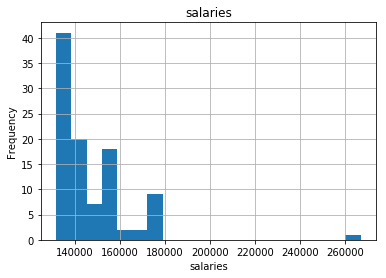

In [51]:
#Generate histograms using the format df.YOUR_CHOICE_OF_COLUMN_NAME.hist(bins=YOUR_CHOICE_OF_BIN_SIZE)

shortForCsv.salary.hist(bins=20)
plt.xlabel('salaries')
plt.ylabel('Frequency')
plt.title('salaries');

plt.show();



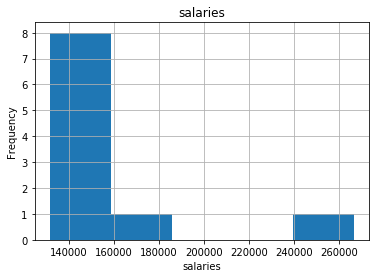

In [52]:

shortForCsv[shortForCsv.gender == "female"].salary.hist(bins=5)
plt.xlabel('salaries')
plt.ylabel('Frequency')
plt.title('salaries');

plt.show();




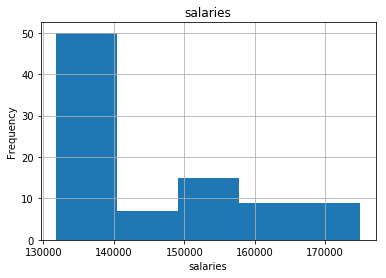

In [53]:
shortForCsv[shortForCsv.gender == "male"].salary.hist(bins=5)
plt.xlabel('salaries')
plt.ylabel('Frequency')
plt.title('salaries');

plt.show();



